# Test of functions individually

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from display_lego_pattern import display_lego_pattern
from extract_green_plate import extract_green_plate
from detect_circles import detect_circles
#from take_image import take_image
#from extract_plate import extract_plate

# Display pattern

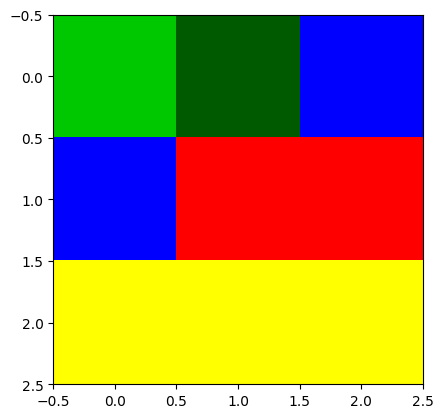

In [2]:
display_lego_pattern([[0, 4, 2],
                       [2, 3, 3],
                       [1, 1, 1]])

# Extract green plate roughly

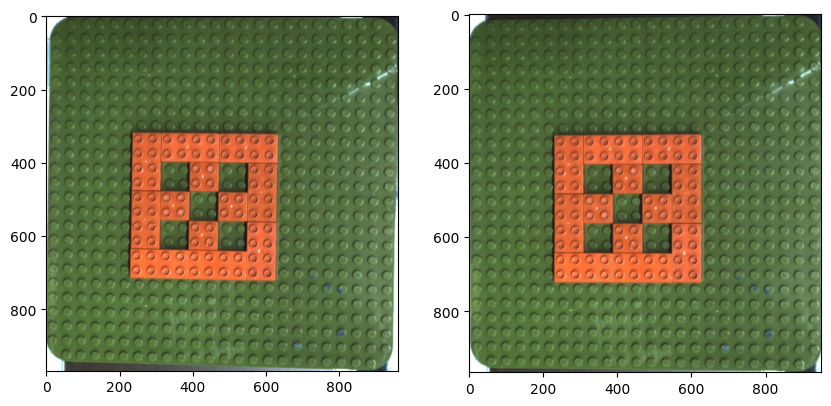

In [11]:
image = cv2.imread('D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Steve_01\Fotos\\test_bikder\Pyramide_1.jpg')
#image = cv2.resize(image, (4000, 4000))
result = extract_green_plate(image, correct_rotation=False, debug=False) #deubg doesnt work in jupiter notebook
rotated = extract_green_plate(image, correct_rotation=True, debug=False)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(result)
f.add_subplot(1,2, 2)
plt.imshow(rotated)
plt.show(block=True)

# Detect cricles in cropped image

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 572
Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 571


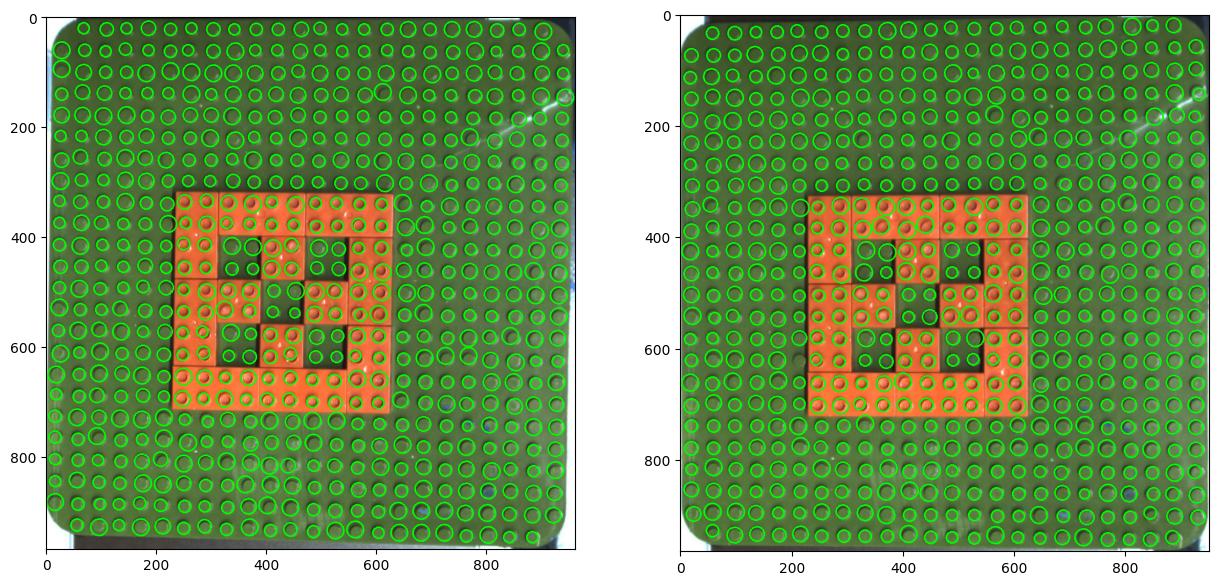

In [12]:
circles,result_image = detect_circles(result,type_of_image='photo',debug=False)
circles_im,rot_image = detect_circles(rotated,type_of_image='photo',debug=False)
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.imshow(result_image)
f.add_subplot(1,2, 2)
plt.imshow(rot_image)
plt.show(block=True)

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 80


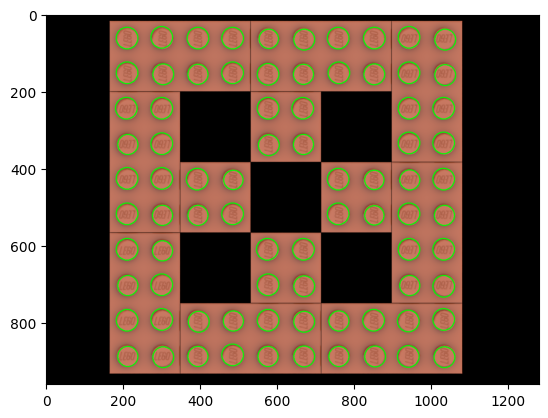

In [9]:
template = cv2.imread('D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Steve_01\Fotos\old\P_top_1.png')
circles_template, template_image = detect_circles(template,type_of_image='plan',debug=False)
plt.imshow(template_image)
plt.show(block=True)


In [6]:
from matrix import *

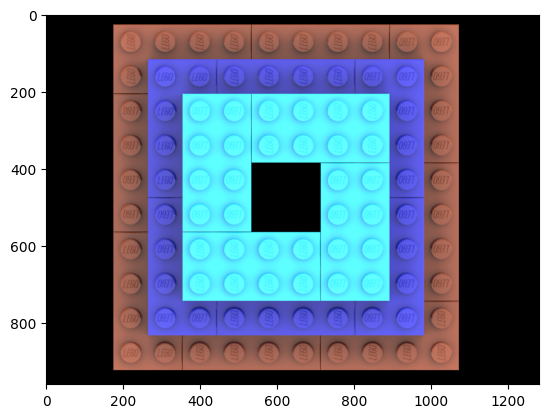

In [7]:
im_plan= template#cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
plt.imshow(im_plan)

In [8]:

matrix_plan, matrix_plan_position= get_matrix(im_plan, circles_template, "plan")
for row in matrix_plan:
    print(row)
    print(" ")

len_sort_Y: 96
len_grids: 10
['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
 
['blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue']
 
['blue', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'blue']
 
['blue', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'blue']
 
['blue', 'red', 'yellow', 'yellow', 'black', 'yellow', 'yellow', 'yellow', 'red', 'blue']
 
['blue', 'red', 'yellow', 'yellow', 'black', 'yellow', 'yellow', 'yellow', 'red', 'blue']
 
['blue', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'blue']
 
['blue', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'blue']
 
['blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue']
 
['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
 


In [9]:
im_image = cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB)
matrix_image, matrix_image_position= get_matrix(im_image, circles_im, "image")

len_sort_Y: 558
len_grids: 24
['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'lime', 'lime', 'lime']
 
['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'lime', 'black', 'lime', 'black', 'black', 'black', 'black', 'lime', 'lime', 'lime']
 
['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'lime', 'black', 'lime', 'lime', 'lime', 'black', 'lime', 'lime', 'lime', 'white']
 
['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'lime', 'lime', 'lime', 'lime', 'lime', 'lime', 'white', 'white']
 
['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'lime', 'black', 'lime', 'lime', 'lime', 'lime', 'white']
 
['black', 'black', 'black', 'black', 'black', 'blue', 'blue', 'blue', 'blue', 'bl

In [11]:
similarity, index_x, index_y= get_similarity(matrix_image,matrix_plan)
print(similarity, index_x,  index_y)

[[7, 7, 8, 9, 10, 23, 10, 9, 8, 6, 6], [8, 8, 10, 12, 14, 32, 14, 12, 10, 8, 6], [9, 10, 12, 14, 17, 40, 17, 14, 12, 10, 7], [10, 12, 14, 16, 20, 48, 20, 16, 14, 12, 8], [11, 14, 17, 20, 25, 60, 25, 20, 17, 14, 9], [24, 32, 40, 48, 58, 100, 58, 48, 40, 32, 22], [11, 14, 17, 20, 25, 60, 25, 20, 17, 14, 9], [10, 12, 14, 16, 20, 48, 20, 16, 14, 12, 8], [9, 10, 12, 14, 17, 40, 17, 14, 12, 10, 7], [8, 8, 10, 12, 14, 32, 14, 12, 10, 8, 6], [7, 7, 8, 9, 10, 23, 10, 9, 8, 7, 6]]
pos_index 5 5
100.0 9 9


In [12]:
print(matrix_plan_position[0][0][1])
print(matrix_plan_position[-1][0][1])
print((matrix_plan_position[0][0][0]) - (matrix_plan_position[0][-1][0]))
print(abs(218-1028))


70
880
64726
810


C:\Users\HP\AppData\Local\Temp\ipykernel_8628\2252981090.py:3: RuntimeWarning: overflow encountered in ushort_scalars
  print((matrix_plan_position[0][0][0]) - (matrix_plan_position[0][-1][0]))


In [13]:
rest_x = 0
rest_y = 0
if (len(matrix_plan_position)%2) == 0:
    y1 = matrix_plan_position[0][0][1]
    y2 = matrix_plan_position[-1][0][1]    
    len_y = len(matrix_image_position)-1
    gab = (y2 - y1)//len_y
    rest_y = 0.5 * gab

if len(matrix_plan_position[0])%2 == 0:
    x1 = matrix_plan_position[0][0][0]
    x2 = matrix_plan_position[0][-1][0]    
    len_x = len(matrix_image_position[0])-1
    gab = (x2 - x1)//len_x
    rest_x = 0.5 * gab
print(rest_y, rest_x)

21.0 21.0


[464, 472]
485 493


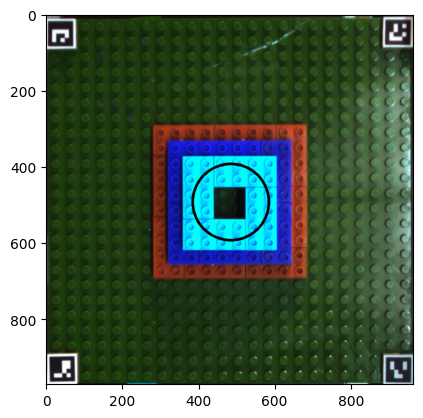

In [14]:
print(matrix_image_position[index_x][index_y])
position = matrix_image_position[index_x][index_y]
x = int(round(position[0])+rest_x)
y = int(round(position[1])+rest_y)
print(x,y)


In [14]:
start_point_y = int(x - ((x2-x1)/4))
start_point_x = int(y - ((y2-y1)/4))

end_point_x = int(x + ((x2-x1)/4))
end_point_y = int(y + ((y2-y1)/4))

NameError: name 'x' is not defined

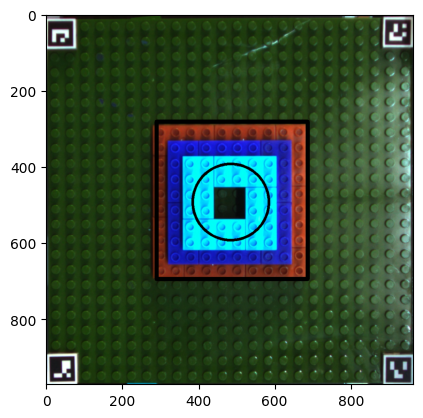

In [ ]:
image = cv2.rectangle(rotated, (start_point_x,start_point_y),  (end_point_x,  end_point_y), (0, 0, 0), 10)
plt.imshow(image)
plt.show()

In [1]:
from matrix import *
dir_list = [
    "D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Steve_01\Fotos\old\P_top_1.png",  
    "D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Steve_01\Fotos\old\P_top_2.png", 
    "D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Steve_01\Fotos\old\P_top_3.png", 
    "D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Steve_01\Fotos\old\P_top_4.png", 
    "D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Steve_01\Fotos\old\P_top_5.png"     
    
]

id_list = [1, 2, 3, 4, 5]
safe_new_matrix("Pyramide", dir_list, id_list)

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 80
len_sort_Y: 80
len_grids: 10
Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 92
len_sort_Y: 92
len_grids: 10
Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 96
len_sort_Y: 96
len_grids: 10
Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 100
len_sort_Y: 100
len_grids: 10
Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 100
len_sort_Y: 100
len_grids: 10


In [1]:
from matrix import *
template_matrix_list, template_name_list = open_saved_matrix()
#print(template_matrix_list, template_name_list)

In [2]:
from display_lego_pattern import display_lego_pattern
from extract_green_plate import extract_green_plate
from detect_circles import detect_circles
import matplotlib.pyplot as plt

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 571
y1, y2, len_y 32 934 23
x1, x2, len_y 136 812 17
x, y: 429 523
template_legnth_y,template_legnth_x 195 195
start_point_y,start_point_x 328 234
end_point_y,end_point_x 718 624


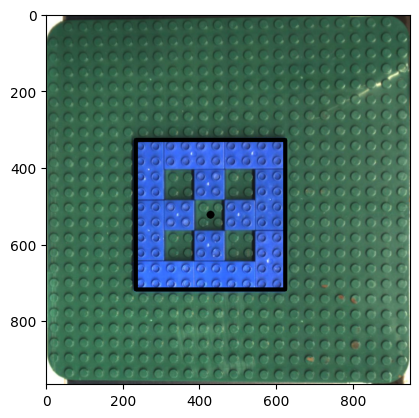

max_sim: 26.0
Ergebnis Pyramide Bauschritt 1


In [3]:
image = cv2.imread('D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Sissi\Steve_copy\Fotos\\test_bikder\Pyramide_1.jpg')
rotated_image, template_name,  matrix_image_position, template_position_matrix, index_x, index_y, max_similarity=detect_matching_template(image, template_matrix_list, template_name_list)
result_image = higlight_target(rotated_image, matrix_image_position, template_position_matrix, index_x, index_y)
im_image = cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB)
plt.imshow(im_image)
plt.show()
print("max_sim:", max_similarity)
print("Ergebnis", template_name)

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 571
y1, y2, len_y 30 938 23
x1, x2, len_y 132 808 17
x, y: 427 523
template_legnth_y,template_legnth_x 195 195
start_point_y,start_point_x 328 232
end_point_y,end_point_x 718 622


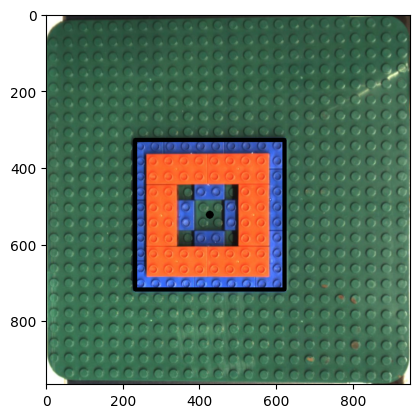

max_sim: 42.0
Ergebnis Pyramide Bauschritt 5


In [4]:
image = cv2.imread('D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Sissi\Steve_copy\Fotos\\test_bikder\Pyramide_2.jpg')
rotated_image, template_name,  matrix_image_position, template_position_matrix, index_x, index_y, max_similarity=detect_matching_template(image, template_matrix_list, template_name_list)
result_image = higlight_target(rotated_image, matrix_image_position, template_position_matrix, index_x, index_y)
im_image = cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB)
plt.imshow(im_image)
plt.show()
print("max_sim:", max_similarity)
print("Ergebnis", template_name)

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 558
y1, y2, len_y 112 870 19
x1, x2, len_y 102 864 19
x, y: 484 491
template_legnth_y,template_legnth_x 195 200
start_point_y,start_point_x 296 284
end_point_y,end_point_x 691 679


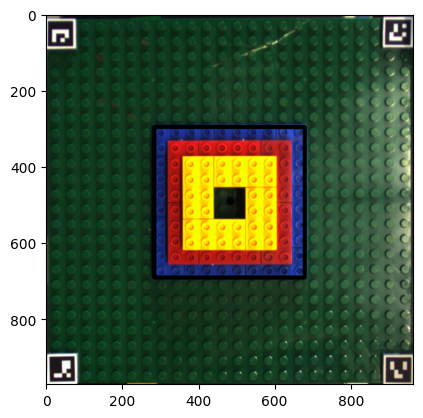

max_sim: 100.0
Ergebnis Pyramide Bauschritt 3


In [8]:
image = cv2.imread('D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Sissi\Steve_copy\Fotos\\test_bikder\pyramide3.jpg')
rotated_image, template_name,  matrix_image_position, template_position_matrix, index_x, index_y, max_similarity=detect_matching_template(image, template_matrix_list, template_name_list)
result_image = higlight_target(rotated_image, matrix_image_position, template_position_matrix, index_x, index_y)
im_image = cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB)
plt.imshow(im_image)
plt.show()
print("max_sim:", max_similarity)
print("Ergebnis", template_name)

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 569
y1, y2, len_y 32 936 23
x1, x2, len_y 136 806 17
x, y: 409 523
template_legnth_y,template_legnth_x 195 195
start_point_y,start_point_x 328 214
end_point_y,end_point_x 718 604


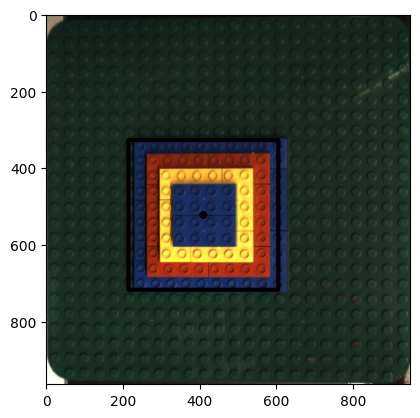

max_sim: 81.0
Ergebnis Pyramide Bauschritt 4


In [7]:
image = cv2.imread('D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Sissi\Steve_copy\Fotos\\test_bikder\Pyramide_4.jpg')
rotated_image, template_name,  matrix_image_position, template_position_matrix, index_x, index_y, max_similarity=detect_matching_template(image, template_matrix_list, template_name_list)
result_image = higlight_target(rotated_image, matrix_image_position, template_position_matrix, index_x, index_y)
im_image = cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB)
plt.imshow(im_image)
plt.show()
print("max_sim:", max_similarity)
print("Ergebnis", template_name)

Full plate has 572 circles. (24x24 - 4 edge circles)
circles found: 566
y1, y2, len_y 34 938 23
x1, x2, len_y 134 806 17
x, y: 401 521
template_legnth_y,template_legnth_x 195 195
start_point_y,start_point_x 326 206
end_point_y,end_point_x 716 596


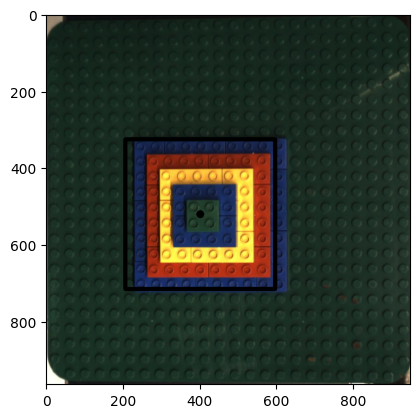

max_sim: 63.0
Ergebnis Pyramide Bauschritt 4


In [5]:
image = cv2.imread('D:\Sissi_Lange\Master\Vorlesungen\F&E\F-E_Projekt_Montage\Sissi\Steve_copy\Fotos\\test_bikder\Pyramide_5.jpg')
rotated_image, template_name,  matrix_image_position, template_position_matrix, index_x, index_y, max_similarity=detect_matching_template(image, template_matrix_list, template_name_list)
result_image = higlight_target(rotated_image, matrix_image_position, template_position_matrix, index_x, index_y)
im_image = cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB)
plt.imshow(im_image)
plt.show()
print("max_sim:", max_similarity)
print("Ergebnis", template_name)

# Take an image with IDS camera 
(needs to be connected and drivers need to be installed)

In [ ]:
low = take_image(exposure_ms=5)

f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.imshow(low)
high = take_image(exposure_ms=35)
f.add_subplot(1,2, 2)
plt.imshow(high)
plt.show(block=True)

NameError: name 'take_image' is not defined

# Extract a rectangle plane which is marked with 4 aruco tags

In [ ]:
image = cv2.imread('/home/steve/Vorlesungen/FE_Projekt/F-E_Projekt_Montage/aruco_test.jpg')

low = image

f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.imshow(low)

high = extract_plate(image)
f.add_subplot(1,2, 2)
plt.imshow(high)
plt.show(block=True)

